SYRIA TEL 

# BUSINESS UNDERSTANDING


# Main objective

To succesfully predict customers with the highest likelihood to churn.

# Specific objectives

To determine state with the highest churn rate.
To analyze how certain factors such as minutes,calls and charges affect the probability to churn.
To 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [3]:
df = pd.read_csv("Syria_Tel.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

Our dataset has *3333* rows and *21* columns .

Let's check for any missing values in our dataset.

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Since our dataset doesn't have any missing values we don't have to drop any null or fill for missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Let's drop the `phone number` column since it is not useful in our prediction.

In [7]:
#dropping a column
df = df.drop(columns =['phone number'])


In [8]:
df.shape

(3333, 20)

We need to check for categorical data in our dataset so that we can perform **one hot encoding** which is an important step for us to make predictions and create Machine learning models.

In [9]:
#checking for categorical values
categorical_cols = df.select_dtypes(include=["object"]).columns
print(categorical_cols)


Index(['state', 'international plan', 'voice mail plan'], dtype='object')


`state`, `international plan` and `voice mail plan` are the columns that are categorical and we need to perfom one hot encoding on 

In [10]:
df["international plan"].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [11]:
df["voice mail plan"].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [12]:
# One-hot encode both binary categorical columns
df_encoded = pd.get_dummies(df,columns=["international plan", "voice mail plan", "state"],drop_first=True,dtype=int)
df_encoded.head()



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


Encoding `state` into 50 dummy columns might not be the recommended way to go about it because it will make it harder for the model to interpret and cause **multicollinearity**, So for this `state` column we took a different approach.

In [13]:
df_encoded["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

For uniformity i wanna change the contents of this columns to 0 and 1 to match the new encoded columns.

In [14]:
#convert entries
df_encoded["churn"] = df_encoded["churn"].map({True: 1, False: 0})


In [15]:
df_encoded["churn"].unique()

array([0, 1], dtype=int64)

In [16]:
df_encoded.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.groupby("churn")["account length"].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,2850.0,100.793684,39.88235,1.0,73.0,100.0,127.0,243.0
True,483.0,102.664596,39.46782,1.0,76.0,103.0,127.0,225.0


Let's check for class imbalance in our dependent variable `churn`

In [18]:
df_encoded["churn"].value_counts(normalize = True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

There is clearly a class imbalance on this column with **85.5%** of the data going to 0 (stay) while the other **14.49%** going to churn and this might not give a correct representation of our model prediction.

In [19]:
#let's check for multicollinearity
corr = df_encoded.corr(numeric_only = True)

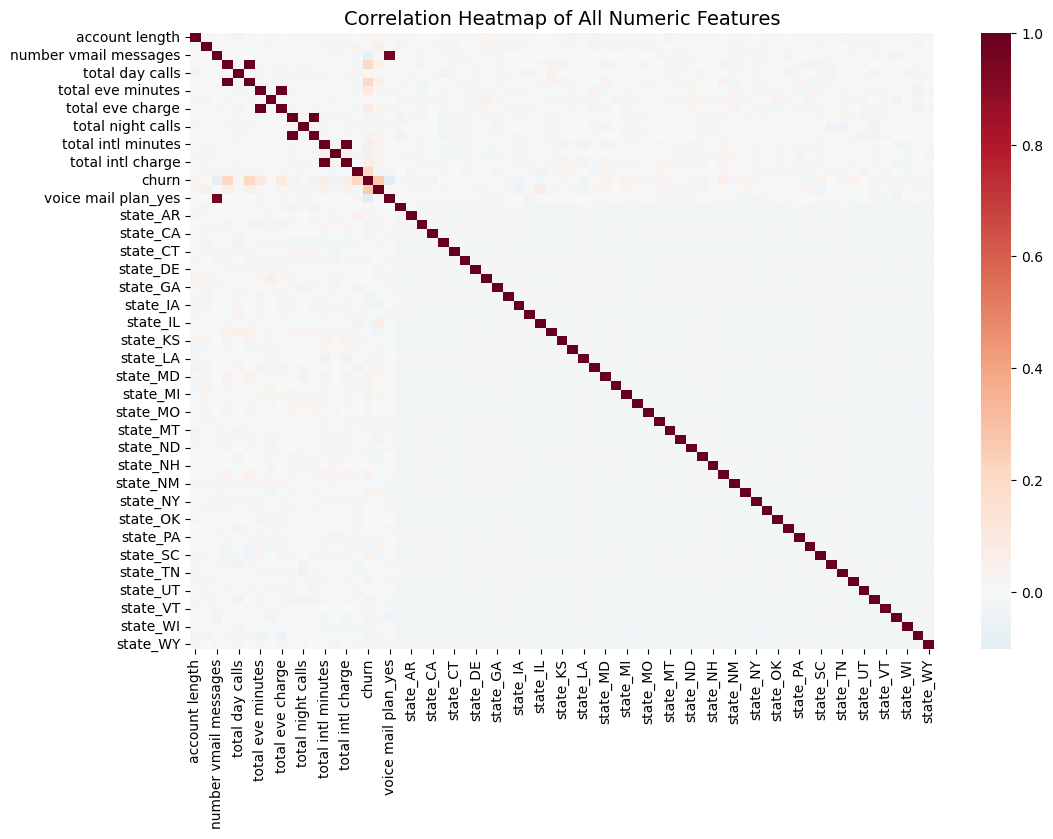

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)
plt.title("Correlation Heatmap of All Numeric Features",fontsize = 14)
plt.show()


Let's check for feature distributions and decide whether to perform log transformation or other normalizations before modelling.

In [21]:
df_encoded.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Every other column seems to have a n even distribution or little to know skewness.But let's take a look at `number vmail messages` whose most customers have 0 messages but some have upto 51 messages.

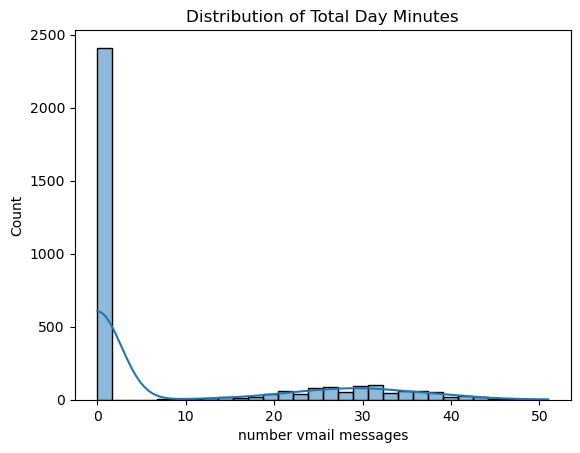

In [22]:
sns.histplot(df_encoded["number vmail messages"], kde=True, bins=30)
plt.title("Distribution of Total Day Minutes")
plt.show()

In [23]:
df_encoded["log_vmail_messages"] = np.log1p(df_encoded["number vmail messages"])

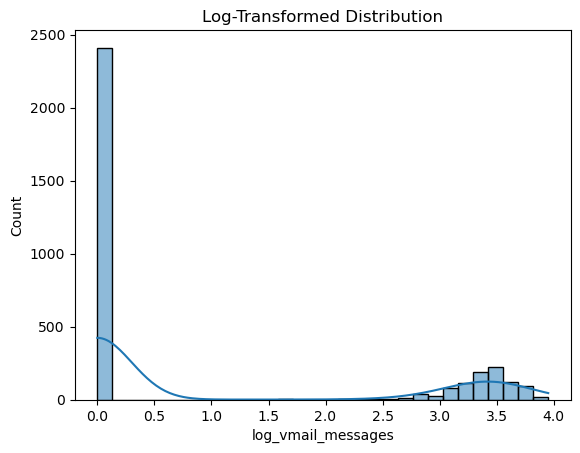

In [24]:
sns.histplot(df_encoded["log_vmail_messages"], kde=True, bins=30)
plt.title("Log-Transformed Distribution")
plt.show()

# feature engineering

Some of the features are communicate the same 

In [26]:
df_encoded["total_minutes"] = df_encoded["total day minutes"] + df_encoded["total eve minutes"] + df_encoded["total night minutes"]
df_encoded["total_calls"] = df_encoded["total day calls"] + df_encoded["total eve calls"] + df_encoded["total night calls"] 
df_encoded["total_charge"] = df_encoded["total day charge"] + df_encoded["total eve charge"] + df_encoded["total night charge"] 



In [27]:
cols_to_drop =["total day minutes", "total eve minutes", "total night minutes", "total day calls", "total eve calls", "total night calls",
    "total day charge", "total eve charge", "total night charge"]

In [28]:
df_encoded = df_encoded.drop(columns = cols_to_drop)

In [29]:
df_encoded.head()

,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,log_vmail_messages,total_minutes,total_calls,total_charge
0,128,415,25,10.0,3,2.70,1,0,0,1,...,0,0,0,0,0,0,3.258097,707.2,300,72.86
1,107,415,26,13.7,3,3.70,1,0,0,1,...,0,0,0,0,0,0,3.295837,611.5,329,55.54
2,137,415,0,12.2,5,3.29,0,0,0,0,...,0,0,0,0,0,0,0.000000,527.2,328,59.00
3,84,408,0,6.6,7,1.78,2,0,1,0,...,0,0,0,0,0,0,0.000000,558.2,248,65.02
4,75,415,0,10.1,3,2.73,3,0,1,0,...,0,0,0,0,0,0,0.000000,501.9,356,49.36


# EXPLANATORY DATA ANALYSIS

In [30]:
# Group by state and churn counts
state_churn = df_encoded.groupby(["state", "churn"]).size().unstack(fill_value=0)

# Add churn rate per state
state_churn["churn_rate"] = state_churn[1] / (state_churn[0] + state_churn[1])

# Sort by churn rate (descending)
state_churn = state_churn.sort_values(by="churn_rate", ascending=False)

state_churn.head(10)  # show top 10 states with highest churn rate


KeyError: 'state'

In [31]:
plt.figure(figsize=(12,6))
state_churn["churn_rate"].plot(kind="bar", color="skyblue")
plt.title("Churn Rate by State")
plt.ylabel("Churn Rate")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()


NameError: name 'state_churn' is not defined

# modelling

Let's move to creating models,specifically a logistic regression model because the problem we are trying to answer is a binary classification and we are also trying to answer the question **what is the probability of a customer to churn or not to churn?** depending on various features.

Before moving to the modelling bit of things we first have to do **feature selection** and also look at our predictor variable `churn`, So as to create our baseline model.

In [32]:
df_encoded['churn'].value_counts(normalize =True)*100

churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

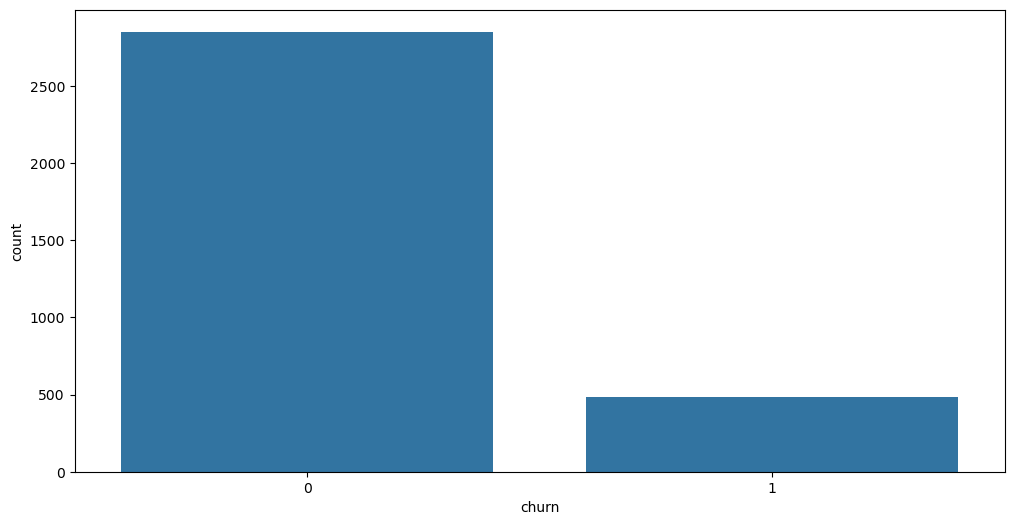

In [33]:
sns.countplot(x="churn", data=df_encoded)
plt.show()

As you can see from the above visual,the target variable is highly imbalanced.The class 0 has a percentage of **85.5%** while our class 1 has **14.49%** .It shows that 85% of the customers stayed while 14.49% churned which we must address during model training to avoid biased predictions.

Since `churn` is binary we can compute **Pearson correlation** between churn and other features before doing Logistic regression. 

In [34]:
# Only keep numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Correlation with churn
churn_corr = numeric_df.corr()["churn"].sort_values(ascending=False)
print(churn_corr)


churn                     1.000000
international plan_yes    0.259852
total_charge              0.226962
customer service calls    0.208750
total_minutes             0.196457
                            ...   
state_VA                 -0.034940
total intl calls         -0.052844
number vmail messages    -0.089728
log_vmail_messages       -0.098991
voice mail plan_yes      -0.102148
Name: churn, Length: 64, dtype: float64


Let's visualize this correlation to `churn` column which is our dependent feature.

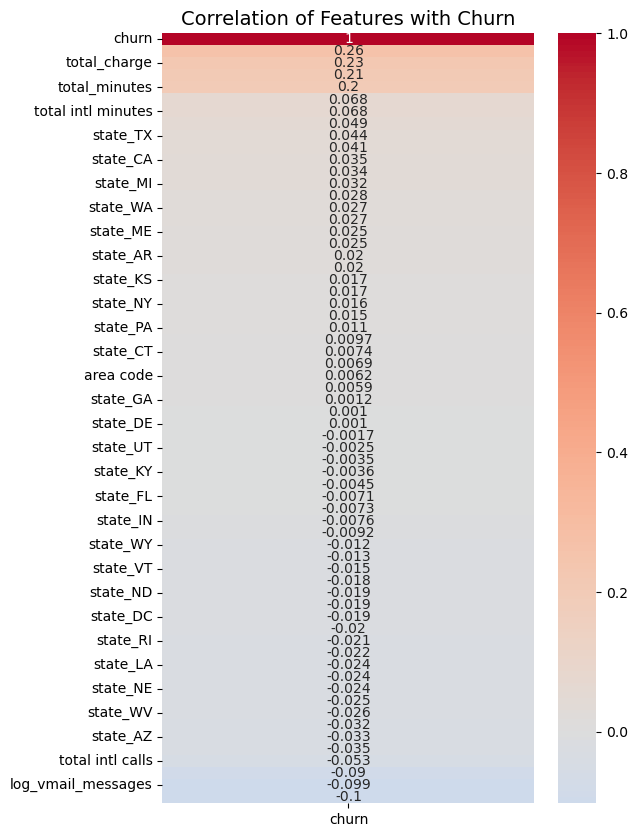

In [35]:
#convert to Dataframe for heatmap
churn_corr_df = churn_corr.to_frame()
#plot heatmap
plt.figure(figsize=(6,10))
sns.heatmap(churn_corr_df, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation of Features with Churn", fontsize=14)
plt.show()

We will be using Positive correlation features because they tell us who is likely to churn while Negaative correlation features tell us who is likely to stay.

In [36]:
#sklearn model import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,roc_curve



In [37]:
#top 4 positive correlatrion with churn
selected_features =["international plan_yes","total_charge" ,"customer service calls" ,"total_minutes"]           

In [38]:
#independent and dependent variables
X = df_encoded[["international plan_yes","total_charge","customer service calls" ,"total_minutes"]]          
y = df_encoded["churn"]

In [39]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y ensures the churn ration is preserved in both train and test
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
#fit the model
log_reg.fit(X_train, y_train)
#let's predict
y_pred = log_reg.predict(X_test)


In [40]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)

                  Feature  Coefficient
0  international plan_yes     2.334522
2  customer service calls     0.623310
1            total_charge     0.079435
3           total_minutes    -0.000756


In [41]:
y_proba = log_reg.predict_proba(X_test)[:, 1]  # probability of churn (class 1)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7616191904047976
Precision: 0.35096153846153844
Recall: 0.7525773195876289
F1 Score: 0.4786885245901639
ROC-AUC: 0.8076143968167843

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85       570
           1       0.35      0.75      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667



**Accuracy score:**

We have an accuracy score of 76% which means about 76% of predictions are correct.But because the dataset is imbalanced accuracy alone is misleading.

**recall:**

The model correctly identifies 75% of true churners meaning the model is good at catching churners even though it misses about 25%.

**Precision :**

Out of all the customers predicted as churners, only 35% actually churn meaning it gives a high number of false positives.It therefore predicts churn when the customer stays.

This model is better at finding churners (high recall) than being precise about them (low precision).
This means:

We will catch most customers who are likely to churn,but also flag many who wouldn’t have churned (false alarms).


Let's visualize our ROC-AUC for more understanding of our model.

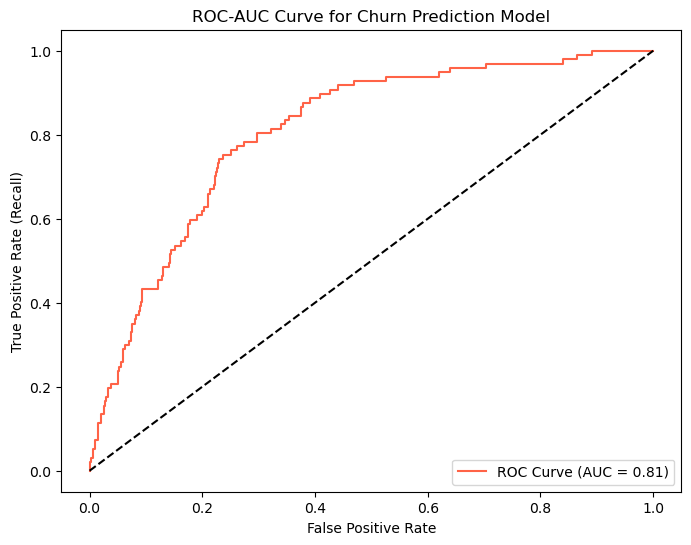

In [43]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="tomato")
plt.plot([0,1], [0,1], linestyle="--", color="black")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve for Churn Prediction Model")
plt.legend(loc="lower right")
plt.show()

Our ROC curve lies well above the diagonal, meaning the model does a good job distinguishing churners from non-churners.It has an AUC = 0.81 which is good and shows a that our model is highly predictive but has room for growth.


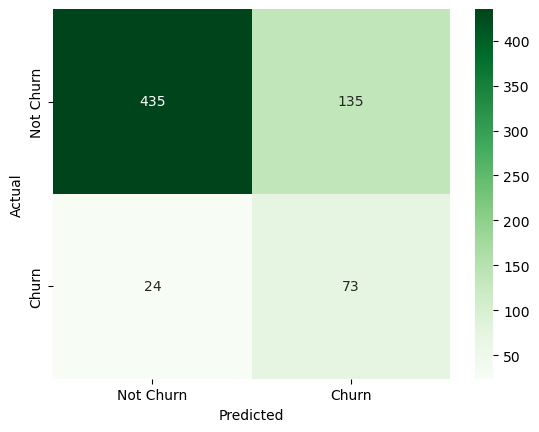

In [44]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Not Churn", "Churn"],
            yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Top-left cell: customers correctly predicted as “stay”(True positive).

Bottom-right cell: customers correctly predicted as “churn”(True negative).

Top-right cell: customers predicted to churn but actually stayed (false positives).

Bottom-left cell: customers predicted to stay but actually churned (false negatives).


# DECISIONTREE CLASSIFIER

Let's build another model to perform classification ,in this case a DecisionTree Classifier .

In [45]:
# Compute correlations with target
corr_target = df_encoded.corr()['churn']

# Select only positive correlations (excluding the target itself)
positive_corr_features = corr_target[corr_target > 0].index.tolist()
positive_corr_features.remove('churn')

print("Positively correlated features:", positive_corr_features)


Positively correlated features: ['account length', 'area code', 'total intl minutes', 'total intl charge', 'customer service calls', 'international plan_yes', 'state_AR', 'state_CA', 'state_CT', 'state_DE', 'state_GA', 'state_KS', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MS', 'state_MT', 'state_NC', 'state_NH', 'state_NJ', 'state_NV', 'state_NY', 'state_OK', 'state_PA', 'state_SC', 'state_TX', 'state_WA', 'total_minutes', 'total_calls', 'total_charge']


In [46]:
X = df_encoded[positive_corr_features]
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [47]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and fit
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.892
Precision: 0.6258503401360545
Recall: 0.6344827586206897
F1 Score: 0.6301369863013698

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       855
           1       0.63      0.63      0.63       145

    accuracy                           0.89      1000
   macro avg       0.78      0.79      0.78      1000
weighted avg       0.89      0.89      0.89      1000



In [49]:
y_proba = dt.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.7850776366202863


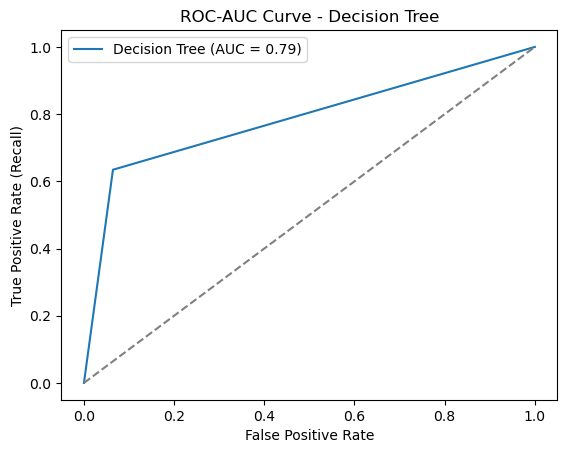

In [50]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve - Decision Tree")
plt.legend()
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best ROC-AUC: 0.8893781314568248


In [52]:
dt_parms = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_parms.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

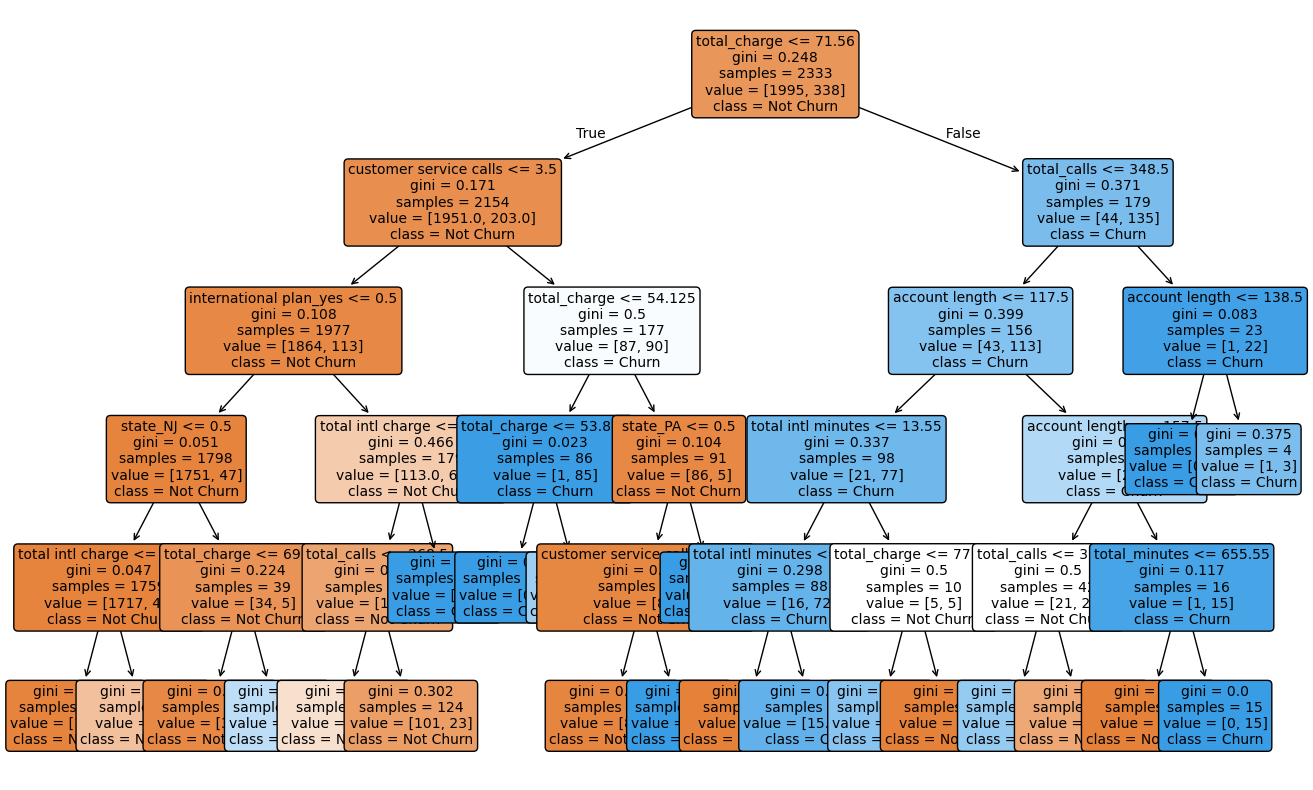

In [53]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
tree.plot_tree(
    dt_parms,
    feature_names=positive_corr_features, 
    class_names=['Not Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


Accuracy BEFORE pruning: 0.9290


<Figure size 1600x800 with 0 Axes>

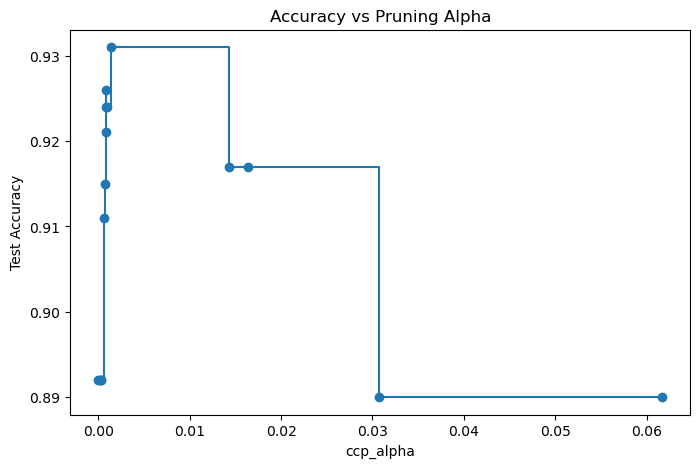

Best alpha: 0.001348
Accuracy AFTER pruning: 0.9310


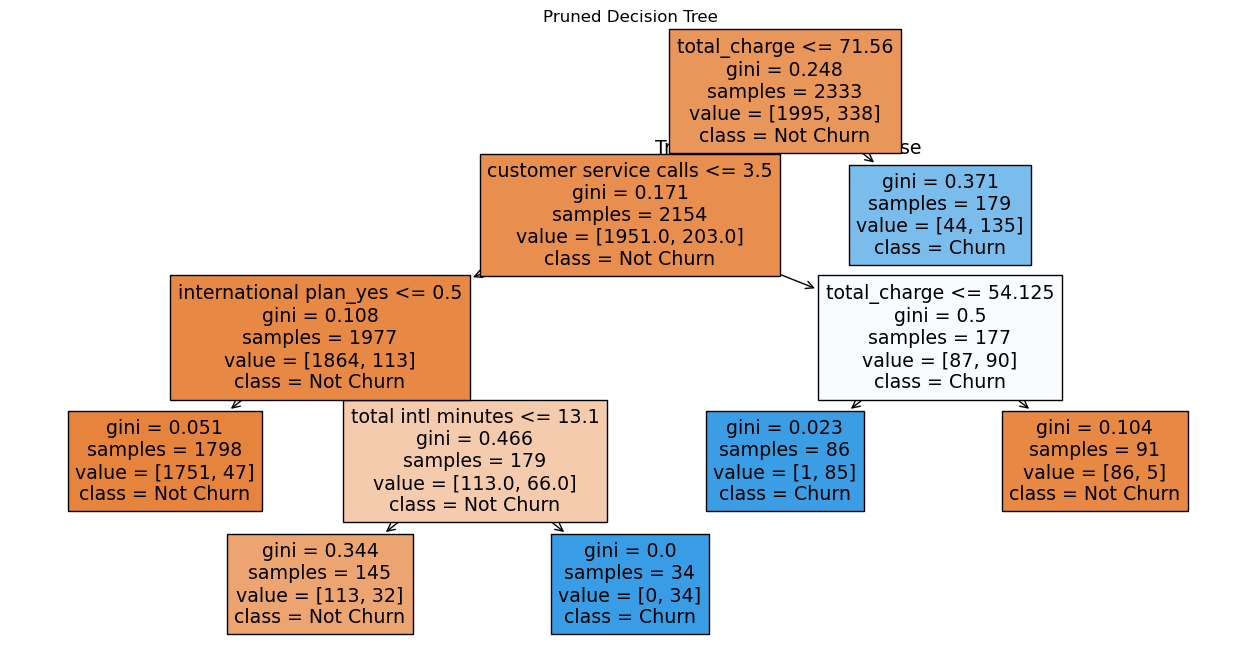

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Predictions & accuracy before pruning
y_pred = dt_parms.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)
print(f"Accuracy BEFORE pruning: {acc_before:.4f}")

# ---- Cost Complexity Pruning ----
path = dt_parms.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate on test set
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot accuracy vs alpha
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, acc_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Pruning Alpha")
plt.show()

# Pick the best alpha (highest test accuracy)
best_alpha = ccp_alphas[acc_scores.index(max(acc_scores))]
print(f"Best alpha: {best_alpha:.6f}")

# Train final pruned tree
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

# Predictions & accuracy after pruning
y_pred_pruned = dt_pruned.predict(X_test)
acc_after = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy AFTER pruning: {acc_after:.4f}")

# ---- Plot the pruned tree ----
plt.figure(figsize=(16,8))
plot_tree(dt_pruned, filled=True, feature_names=X_train.columns, class_names=["Not Churn", "Churn"])
plt.title("Pruned Decision Tree")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
